# 패키지

In [ ]:
!pip install shap

import pandas as pd       
import matplotlib as mat
import matplotlib.pyplot as plt    
import numpy as np
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
!pip install catboost
from catboost import CatBoostClassifier
from catboost import Pool

import shap

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 5.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

secom_data = pd.read_csv('/content/drive/MyDrive/꾀꼬리/default of credit card clients2.csv', sep = ',')
data_or = secom_data.copy()
secom_labels = pd.read_csv('/content/drive/MyDrive/꾀꼬리/card_Y.csv')
label_or = secom_labels.copy()

df1 = pd.read_csv('/content/drive/MyDrive/꾀꼬리/default of credit card clients.csv')
df = df1.copy()

data_dev = pd.read_csv('/content/drive/MyDrive/꾀꼬리/default of credit card clients_dev.csv', sep = ',')
data_del = pd.read_csv('/content/drive/MyDrive/꾀꼬리/default of credit card clients_del.csv', sep = ',')
data_dev_del = pd.read_csv('/content/drive/MyDrive/꾀꼬리/default of credit card clients_dev&del.csv', sep = ',')

In [ ]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


# 데이터 시각화

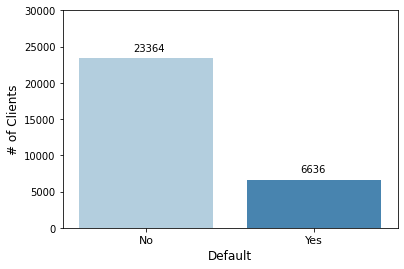

In [ ]:
df.rename(columns = {'PAY_0':'PAY_1', 'default payment next month':'Default'}, inplace = True)

plt.figure(figsize=(6, 4))

ax = sns.countplot(x='Default', data=df, palette="Blues")

plt.xlabel("Default", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,30000)
plt.xticks([0,1], ['No', 'Yes'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+1000))
    
plt.show()

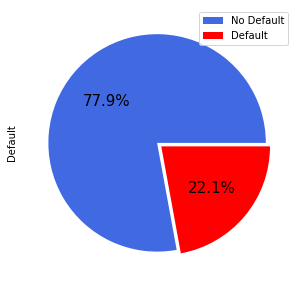

In [ ]:
plt.figure(figsize=(7,5))

df['Default'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['royalblue','red'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['No Default', 'Default'])
plt.show()

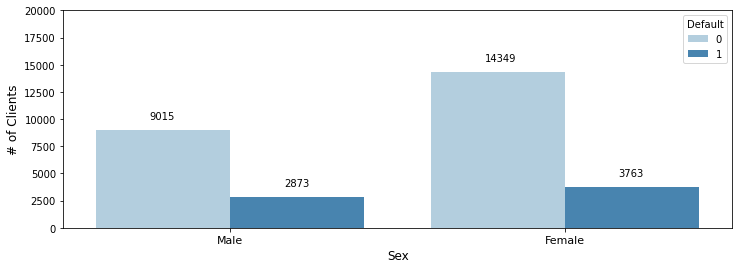

In [ ]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'SEX', hue="Default", palette = 'Blues')

plt.xlabel("Sex", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1],['Male', 'Female'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()

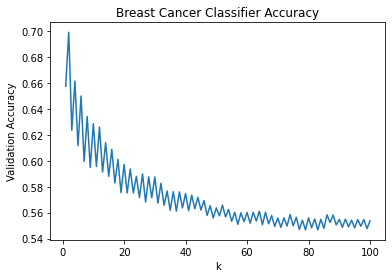

In [ ]:
# 최적의 k값 찾기 -> k = 3 일때
import matplotlib.pyplot as plt
k_list = range(1,101)
accuracies = []
for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(data_over, label_over)
  accuracies.append(classifier.score(X_test, Y_test))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()

# 데이터 정규화

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
# 오리지널 데이터
std_scaler.fit(data_or)
std = std_scaler.transform(data_or)
data_or_sk = pd.DataFrame(std, columns = data_or.columns, index = list(data_or.index.values))
# dev 데이터
std_scaler.fit(data_dev)
std = std_scaler.transform(data_dev)
data_dev_sk = pd.DataFrame(std, columns = data_dev.columns, index = list(data_dev.index.values))
# del 데이터
std_scaler.fit(data_del)
std = std_scaler.transform(data_del)
data_del_sk = pd.DataFrame(std, columns = data_del.columns, index = list(data_del.index.values))
# dev+del 데이터
std_scaler.fit(data_dev_del)
std = std_scaler.transform(data_dev_del)
data_dev_del_sk = pd.DataFrame(std, columns = data_dev_del.columns, index = list(data_dev_del.index.values))

# 데이터 훈련셋과 검정셋 나누기

In [ ]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(data_or_sk, label_or, test_size = 0.2, random_state = 0)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(data_dev_sk, label_or, test_size = 0.2, random_state = 0)
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(data_del_sk, label_or, test_size = 0.2, random_state = 0)
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(data_dev_del_sk, label_or, test_size = 0.2, random_state = 0)

# 데이터 오버샘플링과 아닌거로 나누기

In [ ]:
from imblearn.over_sampling import SMOTE

# smote = 0, original data
smote1 = SMOTE(random_state = 42)
data_over1, label_over1 = smote1.fit_resample(X_train1, Y_train1)
label_over1.value_counts()

# smote = 0, dev data
smote2 = SMOTE(random_state = 42)
data_over2, label_over2 = smote2.fit_resample(X_train2, Y_train2)
label_over2.value_counts()

# smote = 0, del data
smote3 = SMOTE(random_state = 42)
data_over3, label_over3 = smote3.fit_resample(X_train3, Y_train3)
label_over3.value_counts()

# smote = 0, dev&del data
smote4 = SMOTE(random_state = 42)
data_over4, label_over4 = smote4.fit_resample(X_train4, Y_train4)
label_over4.value_counts()

# smote 안한거, original data
# smote 안한거, dev data
# smote 안한거, del data
# smote 안한거, dev&del data

default payment next month
0                             18661
1                             18661
dtype: int64

# 패키지

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 로지스틱 회귀

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4703
           1       0.49      0.56      0.52      1297

    accuracy                           0.78      6000
   macro avg       0.68      0.70      0.69      6000
weighted avg       0.79      0.78      0.78      6000

교차 검증 점수: 0.8275
AUC 점수: 0.7006
F1-Score: 0.5239


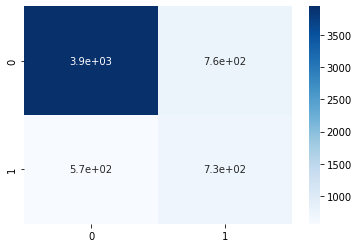

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score
from sklearn.model_selection import cross_val_score, KFold

LR1 = LogisticRegression()
LR1.fit(data_over1, label_over1)
pred_data = LR1.predict(X_test1)

kf = KFold(n_splits=10)
cm1 = pd.DataFrame(confusion_matrix(Y_test1, pred_data))
sns.heatmap(cm1, annot=True, cmap='Blues')
print(classification_report(Y_test1, pred_data))
print("교차 검증 점수: {:.4f}".format(cross_val_score(LR1, X_test1, Y_test1, cv=kf).mean()))
print("AUC 점수: {:.4f}".format(roc_auc_score(Y_test1, pred_data)))
print("F1-Score: {:.4f}".format(f1_score(pred_data, Y_test1)))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      4703
           1       0.49      0.57      0.52      1297

    accuracy                           0.78      6000
   macro avg       0.68      0.70      0.69      6000
weighted avg       0.79      0.78      0.78      6000

교차 검증 점수: 0.8275
AUC 점수: 0.7007
F1-Score: 0.5236


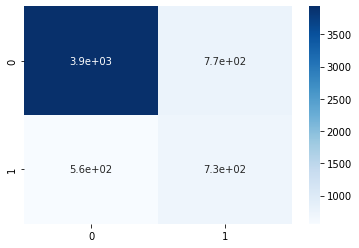

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score
from sklearn.model_selection import cross_val_score, KFold

LR2 = LogisticRegression()
LR2.fit(data_over2, label_over2)
pred_data = LR2.predict(X_test2)

kf = KFold(n_splits=10)
cm2 = pd.DataFrame(confusion_matrix(Y_test2, pred_data))
sns.heatmap(cm2, annot=True, cmap='Blues')
print(classification_report(Y_test2, pred_data))
print("교차 검증 점수: {:.4f}".format(cross_val_score(LR2, X_test2, Y_test2, cv=kf).mean()))
print("AUC 점수: {:.4f}".format(roc_auc_score(Y_test2, pred_data)))
print("F1-Score: {:.4f}".format(f1_score(pred_data, Y_test2)))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      4703
           1       0.48      0.56      0.52      1297

    accuracy                           0.77      6000
   macro avg       0.68      0.70      0.68      6000
weighted avg       0.79      0.77      0.78      6000

교차 검증 점수: 0.8275
AUC 점수: 0.6956
F1-Score: 0.5163


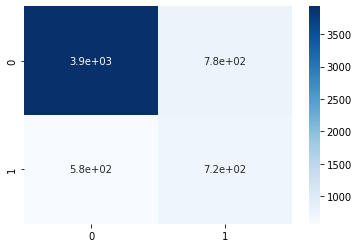

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score
from sklearn.model_selection import cross_val_score, KFold

LR3 = LogisticRegression()
LR3.fit(data_over3, label_over3)
pred_data = LR3.predict(X_test3)

kf = KFold(n_splits=10)
cm3 = pd.DataFrame(confusion_matrix(Y_test3, pred_data))
sns.heatmap(cm3, annot=True, cmap='Blues')
print(classification_report(Y_test3, pred_data))
print("교차 검증 점수: {:.4f}".format(cross_val_score(LR3, X_test3, Y_test3, cv=kf).mean()))
print("AUC 점수: {:.4f}".format(roc_auc_score(Y_test3, pred_data)))
print("F1-Score: {:.4f}".format(f1_score(pred_data, Y_test3)))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      4703
           1       0.48      0.56      0.52      1297

    accuracy                           0.78      6000
   macro avg       0.68      0.70      0.69      6000
weighted avg       0.79      0.78      0.78      6000

교차 검증 점수: 0.8273
AUC 점수: 0.6969
F1-Score: 0.5180


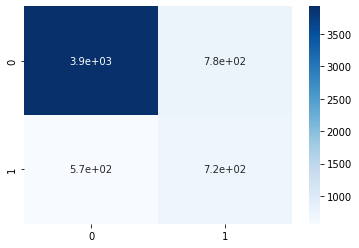

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score
from sklearn.model_selection import cross_val_score, KFold

LR4 = LogisticRegression()
LR4.fit(data_over4, label_over4)
pred_data = LR4.predict(X_test4)

kf = KFold(n_splits=10)
cm4 = pd.DataFrame(confusion_matrix(Y_test4, pred_data))
sns.heatmap(cm4, annot=True, cmap='Blues')
print(classification_report(Y_test4, pred_data))
print("교차 검증 점수: {:.4f}".format(cross_val_score(LR4, X_test4, Y_test4, cv=kf).mean()))
print("AUC 점수: {:.4f}".format(roc_auc_score(Y_test4, pred_data)))
print("F1-Score: {:.4f}".format(f1_score(pred_data, Y_test4)))

              precision    recall  f1-score   support

           0       0.81      0.47      0.60      4703
           1       0.24      0.59      0.34      1297

    accuracy                           0.50      6000
   macro avg       0.52      0.53      0.47      6000
weighted avg       0.68      0.50      0.54      6000

교차 검증 점수: 0.8275
AUC 점수: 0.5307
F1-Score: 0.3362


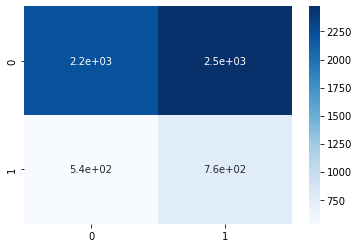

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score
from sklearn.model_selection import cross_val_score, KFold

LR5 = LogisticRegression()
LR5.fit(data_or, label_or)
pred_data = LR5.predict(X_test1)

kf = KFold(n_splits=10)
cm1 = pd.DataFrame(confusion_matrix(Y_test1, pred_data))
sns.heatmap(cm1, annot=True, cmap='Blues')
print(classification_report(Y_test1, pred_data))
print("교차 검증 점수: {:.4f}".format(cross_val_score(LR5, X_test1, Y_test1, cv=kf).mean()))
print("AUC 점수: {:.4f}".format(roc_auc_score(Y_test1, pred_data)))
print("F1-Score: {:.4f}".format(f1_score(pred_data, Y_test1)))

              precision    recall  f1-score   support

           0       0.80      0.47      0.59      4703
           1       0.23      0.58      0.33      1297

    accuracy                           0.49      6000
   macro avg       0.52      0.53      0.46      6000
weighted avg       0.68      0.49      0.54      6000

교차 검증 점수: 0.8275
AUC 점수: 0.5257
F1-Score: 0.3322


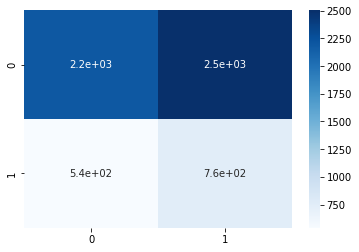

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score
from sklearn.model_selection import cross_val_score, KFold

LR6 = LogisticRegression()
LR6.fit(data_dev, label_or)
pred_data = LR6.predict(X_test2)

kf = KFold(n_splits=10)
cm2 = pd.DataFrame(confusion_matrix(Y_test2, pred_data))
sns.heatmap(cm2, annot=True, cmap='Blues')
print(classification_report(Y_test2, pred_data))
print("교차 검증 점수: {:.4f}".format(cross_val_score(LR6, X_test2, Y_test2, cv=kf).mean()))
print("AUC 점수: {:.4f}".format(roc_auc_score(Y_test2, pred_data)))
print("F1-Score: {:.4f}".format(f1_score(pred_data, Y_test2)))

              precision    recall  f1-score   support

           0       0.80      0.47      0.59      4703
           1       0.23      0.58      0.33      1297

    accuracy                           0.49      6000
   macro avg       0.51      0.52      0.46      6000
weighted avg       0.68      0.49      0.53      6000

교차 검증 점수: 0.8275
AUC 점수: 0.5211
F1-Score: 0.3281


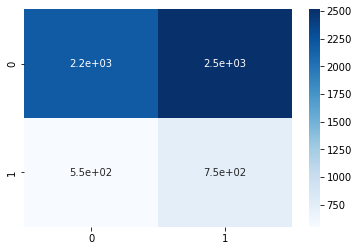

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score
from sklearn.model_selection import cross_val_score, KFold

LR7 = LogisticRegression()
LR7.fit(data_del, label_or)
pred_data = LR7.predict(X_test3)

kf = KFold(n_splits=10)
cm3 = pd.DataFrame(confusion_matrix(Y_test3, pred_data))
sns.heatmap(cm3, annot=True, cmap='Blues')
print(classification_report(Y_test3, pred_data))
print("교차 검증 점수: {:.4f}".format(cross_val_score(LR7, X_test3, Y_test3, cv=kf).mean()))
print("AUC 점수: {:.4f}".format(roc_auc_score(Y_test3, pred_data)))
print("F1-Score: {:.4f}".format(f1_score(pred_data, Y_test3)))

              precision    recall  f1-score   support

           0       0.80      0.47      0.59      4703
           1       0.23      0.58      0.33      1297

    accuracy                           0.49      6000
   macro avg       0.51      0.52      0.46      6000
weighted avg       0.68      0.49      0.53      6000

교차 검증 점수: 0.8273
AUC 점수: 0.5211
F1-Score: 0.3281


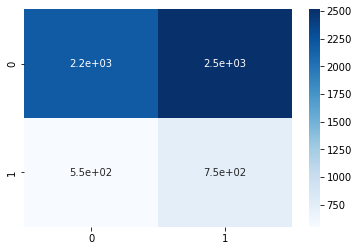

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score
from sklearn.model_selection import cross_val_score, KFold

LR8 = LogisticRegression()
LR8.fit(data_dev_del, label_or)
pred_data = LR8.predict(X_test4)

kf = KFold(n_splits=10)
cm4 = pd.DataFrame(confusion_matrix(Y_test4, pred_data))
sns.heatmap(cm4, annot=True, cmap='Blues')
print(classification_report(Y_test4, pred_data))
print("교차 검증 점수: {:.4f}".format(cross_val_score(LR8, X_test4, Y_test4, cv=kf).mean()))
print("AUC 점수: {:.4f}".format(roc_auc_score(Y_test4, pred_data)))
print("F1-Score: {:.4f}".format(f1_score(pred_data, Y_test4)))

# 나이브 베이즈

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      4703
           1       0.46      0.61      0.52      1297

    accuracy                           0.76      6000
   macro avg       0.67      0.70      0.68      6000
weighted avg       0.79      0.76      0.77      6000

교차 검증 점수: 0.7732
AUC 점수: 0.7036
F1-Score: 0.5209


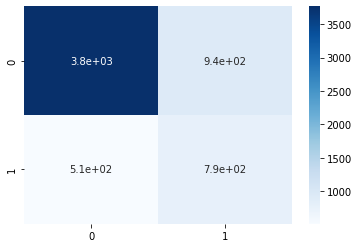

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score
from sklearn.model_selection import cross_val_score, KFold

NB1 = GaussianNB()
NB1.fit(data_over1, label_over1)
pred_data = NB1.predict(X_test1)

kf = KFold(n_splits=10)
cm1 = pd.DataFrame(confusion_matrix(Y_test1, pred_data))
sns.heatmap(cm1, annot=True, cmap='Blues')
print(classification_report(Y_test1, pred_data))
print("교차 검증 점수: {:.4f}".format(cross_val_score(NB1, X_test1, Y_test1, cv=kf).mean()))
print("AUC 점수: {:.4f}".format(roc_auc_score(Y_test1, pred_data)))
print("F1-Score: {:.4f}".format(f1_score(pred_data, Y_test1)))

              precision    recall  f1-score   support

           0       0.90      0.42      0.58      4703
           1       0.28      0.83      0.42      1297

    accuracy                           0.51      6000
   macro avg       0.59      0.63      0.50      6000
weighted avg       0.77      0.51      0.54      6000

교차 검증 점수: 0.7922
AUC 점수: 0.6255
F1-Score: 0.4224


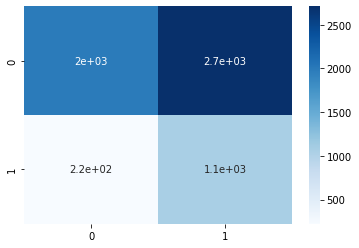

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score
from sklearn.model_selection import cross_val_score, KFold

NB2 = GaussianNB()
NB2.fit(data_over2, label_over2)
pred_data = NB2.predict(X_test2)

kf = KFold(n_splits=10)
cm2 = pd.DataFrame(confusion_matrix(Y_test2, pred_data))
sns.heatmap(cm2, annot=True, cmap='Blues')
print(classification_report(Y_test2, pred_data))
print("교차 검증 점수: {:.4f}".format(cross_val_score(NB2, X_test2, Y_test2, cv=kf).mean()))
print("AUC 점수: {:.4f}".format(roc_auc_score(Y_test2, pred_data)))
print("F1-Score: {:.4f}".format(f1_score(pred_data, Y_test2)))

              precision    recall  f1-score   support

           0       0.89      0.57      0.70      4703
           1       0.33      0.76      0.46      1297

    accuracy                           0.61      6000
   macro avg       0.61      0.66      0.58      6000
weighted avg       0.77      0.61      0.64      6000

교차 검증 점수: 0.7948
AUC 점수: 0.6632
F1-Score: 0.4563


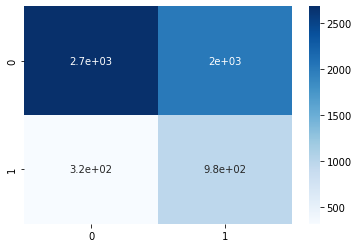

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score
from sklearn.model_selection import cross_val_score, KFold

NB3 = GaussianNB()
NB3.fit(data_over3, label_over3)
pred_data = NB3.predict(X_test3)

kf = KFold(n_splits=10)
cm3 = pd.DataFrame(confusion_matrix(Y_test3, pred_data))
sns.heatmap(cm3, annot=True, cmap='Blues')
print(classification_report(Y_test3, pred_data))
print("교차 검증 점수: {:.4f}".format(cross_val_score(NB3, X_test3, Y_test3, cv=kf).mean()))
print("AUC 점수: {:.4f}".format(roc_auc_score(Y_test3, pred_data)))
print("F1-Score: {:.4f}".format(f1_score(pred_data, Y_test3)))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      4703
           1       0.50      0.53      0.51      1297

    accuracy                           0.78      6000
   macro avg       0.68      0.69      0.69      6000
weighted avg       0.79      0.78      0.79      6000

교차 검증 점수: 0.7920
AUC 점수: 0.6911
F1-Score: 0.5133


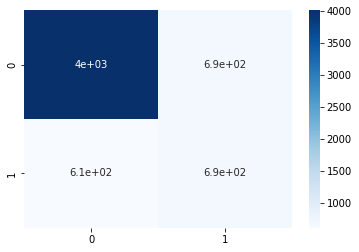

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score
from sklearn.model_selection import cross_val_score, KFold

NB4 = GaussianNB()
NB4.fit(data_over4, label_over4)
pred_data = NB4.predict(X_test4)

kf = KFold(n_splits=10)
cm4 = pd.DataFrame(confusion_matrix(Y_test4, pred_data))
sns.heatmap(cm4, annot=True, cmap='Blues')
print(classification_report(Y_test4, pred_data))
print("교차 검증 점수: {:.4f}".format(cross_val_score(NB4, X_test4, Y_test4, cv=kf).mean()))
print("AUC 점수: {:.4f}".format(roc_auc_score(Y_test4, pred_data)))
print("F1-Score: {:.4f}".format(f1_score(pred_data, Y_test4)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4703
           1       0.22      1.00      0.36      1297

    accuracy                           0.22      6000
   macro avg       0.11      0.50      0.18      6000
weighted avg       0.05      0.22      0.08      6000

교차 검증 점수: 0.7732
AUC 점수: 0.5000
F1-Score: 0.3555


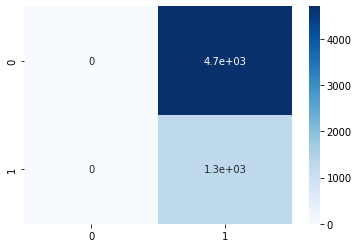

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score
from sklearn.model_selection import cross_val_score, KFold

NB5 = GaussianNB()
NB5.fit(data_or, label_or)
pred_data = NB5.predict(X_test1)

kf = KFold(n_splits=10)
cm1 = pd.DataFrame(confusion_matrix(Y_test1, pred_data))
sns.heatmap(cm1, annot=True, cmap='Blues')
print(classification_report(Y_test1, pred_data))
print("교차 검증 점수: {:.4f}".format(cross_val_score(NB5, X_test1, Y_test1, cv=kf).mean()))
print("AUC 점수: {:.4f}".format(roc_auc_score(Y_test1, pred_data)))
print("F1-Score: {:.4f}".format(f1_score(pred_data, Y_test1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4703
           1       0.22      1.00      0.36      1297

    accuracy                           0.22      6000
   macro avg       0.11      0.50      0.18      6000
weighted avg       0.05      0.22      0.08      6000

교차 검증 점수: 0.7922
AUC 점수: 0.5000
F1-Score: 0.3555


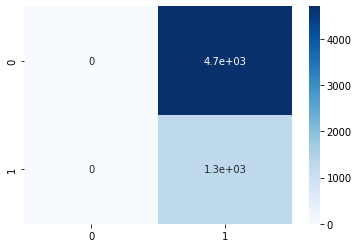

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score
from sklearn.model_selection import cross_val_score, KFold

NB6 = GaussianNB()
NB6.fit(data_dev, label_or)
pred_data = NB6.predict(X_test2)

kf = KFold(n_splits=10)
cm2 = pd.DataFrame(confusion_matrix(Y_test2, pred_data))
sns.heatmap(cm2, annot=True, cmap='Blues')
print(classification_report(Y_test2, pred_data))
print("교차 검증 점수: {:.4f}".format(cross_val_score(NB6, X_test2, Y_test2, cv=kf).mean()))
print("AUC 점수: {:.4f}".format(roc_auc_score(Y_test2, pred_data)))
print("F1-Score: {:.4f}".format(f1_score(pred_data, Y_test2)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4703
           1       0.22      1.00      0.36      1297

    accuracy                           0.22      6000
   macro avg       0.11      0.50      0.18      6000
weighted avg       0.05      0.22      0.08      6000

교차 검증 점수: 0.7948
AUC 점수: 0.5000
F1-Score: 0.3555


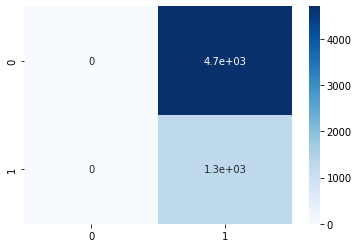

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score
from sklearn.model_selection import cross_val_score, KFold

NB7 = GaussianNB()
NB7.fit(data_del, label_or)
pred_data = NB7.predict(X_test3)

kf = KFold(n_splits=10)
cm3 = pd.DataFrame(confusion_matrix(Y_test3, pred_data))
sns.heatmap(cm3, annot=True, cmap='Blues')
print(classification_report(Y_test3, pred_data))
print("교차 검증 점수: {:.4f}".format(cross_val_score(NB7, X_test3, Y_test3, cv=kf).mean()))
print("AUC 점수: {:.4f}".format(roc_auc_score(Y_test3, pred_data)))
print("F1-Score: {:.4f}".format(f1_score(pred_data, Y_test3)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4703
           1       0.22      1.00      0.36      1297

    accuracy                           0.22      6000
   macro avg       0.11      0.50      0.18      6000
weighted avg       0.05      0.22      0.08      6000

교차 검증 점수: 0.7920
AUC 점수: 0.5000
F1-Score: 0.3555


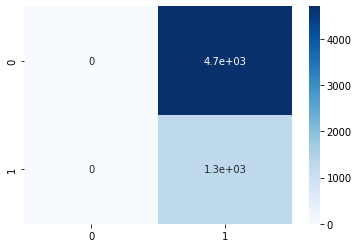

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score
from sklearn.model_selection import cross_val_score, KFold

NB8 = GaussianNB()
NB8.fit(data_dev_del, label_or)
pred_data = NB8.predict(X_test4)

kf = KFold(n_splits=10)
cm4 = pd.DataFrame(confusion_matrix(Y_test4, pred_data))
sns.heatmap(cm4, annot=True, cmap='Blues')
print(classification_report(Y_test4, pred_data))
print("교차 검증 점수: {:.4f}".format(cross_val_score(NB8, X_test4, Y_test4, cv=kf).mean()))
print("AUC 점수: {:.4f}".format(roc_auc_score(Y_test4, pred_data)))
print("F1-Score: {:.4f}".format(f1_score(pred_data, Y_test4)))